<a id='home'></a>
# Investigation of Twitter archive of `WeRateDogs`

## Table of Contents
<ol>
    <li><a href="#Introduction">Introduction</a></li>
    <li><a href="#question">Questions imposed</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">End</a></li>
</ol>

<a id='Introduction'></a>
## Introduction

<a href="#home">Home</a>

### About the Dataset

The dataset that is being wrangled (and analyzed and visualized) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

### Inspiration
Is it possible to find the best rated dogs based on the tweets

<a id='question'></a>
### Questions -
- Ratings of dogs based on type
- Best dog according to rating
- Tweets based on hour of the day
- Tweets based on the days of the week
- Tweets based on month
- Most important factor which leads to better rating


<a href="#home">Home</a>

<a id='wrangling'></a>
## Data Wrangling




<a href="#home">Home</a>
### Gathering Data

In [146]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [147]:
# Load data
twitter_df = pd.read_csv('data/twitter-archive-enhanced-2.csv')
image_df = pd.read_csv('data/image-predictions.tsv', sep='\t')
tweet_df = pd.read_json('data/tweet-json.txt', lines=True)

#### Making a copy of original data

In [148]:
twitter_df_original = twitter_df.copy()
image_df_original = image_df.copy()
tweet_df_original = tweet_df.copy()

### Accessing Data

### Visual Assessment

In [149]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [150]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [151]:
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Programmatic Assessment

In [152]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [153]:
twitter_df.shape

(2356, 17)

In [154]:
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [155]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Data Quality Issues
 
 1. Many null values
 
     - `in_reply_to_status_id`
     
     - `in_reply_to_user_id`
     
     - `retweeted_status_id`
     
     - `retweeted_status_user_id`
     
     
 2. Incorrect data types
     
     - `tweet_id`
     
     - `in_reply_to_status_id`
     
     - `in_reply_to_user_id`
     
     - `retweeted_status_id`
     
     - `retweeted_status_user_id`
 
 
 3. `rating_denominator` has minimum value as 0 which is not possible for denominators
 
 
 4. `datetime` format for 
 
     - `timestamp`
     
     - `retweeted_status_timestamp`
     
     
 5. Retweets need to be removed to avoid duplication in our analysis. This may be done by removing rows that have non-empty `retweeted_status_id`, `retweeted_status_user_id`, `and retweeted_status_timestamp`    
 
 
 6. Add `rating` column as the ratio of numerator and denominator
 
 
 7. Reorder the columns into similar ones close to each other after adding or removing some extra columns
 
 
 8. Some numerators are wrongly entered. They are different as in the comments
 
 
### Data Tidiness Issues
 - `category` column can be created to store the type of dog instead of the last 4 columns named as `doggo`, `floofer`, `pupper`, `puppo`
 
 
 - Information about one type of observational unit (tweets) is spread across three different dataframes. Therefore, these three dataframes should be merged as they are part of the same observational unit.
 


### Data Cleaning

#### Define
 - Retweets need to be removed to avoid duplication in our analysis. This may be done by removing rows that have non-empty `retweeted_status_id`, `retweeted_status_user_id`, `and retweeted_status_timestamp`    


#### Code

In [156]:
# twitter_df = twitter_df[(twitter_df['retweeted_status_timestamp'].isna()) | 
#                 (twitter_df['retweeted_status_id'].isna()) |
#     (twitter_df['retweeted_status_user_id'].isna())]

twitter_df1 = twitter_df[(twitter_df['retweeted_status_timestamp'].isna() == False) | 
                (twitter_df['retweeted_status_id'].isna() == False) |
    (twitter_df['retweeted_status_user_id'].isna() == False)]

twitter_df1.reset_index(inplace=True, drop=True)

twitter_df.reset_index(inplace=True, drop=True)

#### Test

In [157]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [158]:
twitter_df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
1,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
2,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
3,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
4,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


#### Define
 - Incorrect data types
     
     - `tweet_id`
     
     - `in_reply_to_status_id`
     
     - `in_reply_to_user_id`
     
     - `retweeted_status_id`
     
     - `retweeted_status_user_id`
     
#### Code

In [159]:
# Modify Data types

twitter_df['tweet_id'] = twitter_df['tweet_id'].astype('str')
twitter_df['in_reply_to_status_id'] = twitter_df['in_reply_to_status_id'].astype('str')
twitter_df['in_reply_to_user_id'] = twitter_df['in_reply_to_user_id'].astype('str')
twitter_df['retweeted_status_id'] = twitter_df['retweeted_status_id'].astype('str')
twitter_df['retweeted_status_user_id'] = twitter_df['retweeted_status_user_id'].astype('str')

#### Test

In [160]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)


In [161]:
twitter_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 17 columns):
tweet_id                      181 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     181 non-null object
source                        181 non-null object
text                          181 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 180 non-null object
rating_numerator              181 non-null int64
rating_denominator            181 non-null int64
name                          181 non-null object
doggo                         181 non-null object
floofer                       181 non-null object
pupper                        181 non-null object
puppo                         181 non-null object
dtypes: float64(4), int64(3), object(10)
memory 

#### Define
 - `datetime` format for 
 
     - `timestamp`
     
     - `retweeted_status_timestamp`


In [162]:
twitter_df['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [163]:
twitter_df[twitter_df['retweeted_status_timestamp'].isna() == False]['retweeted_status_timestamp'].head()

19    2017-07-19 00:47:34 +0000
32    2017-07-15 02:44:07 +0000
36    2017-02-12 01:04:29 +0000
68    2017-06-23 01:10:23 +0000
73    2017-06-23 16:00:04 +0000
Name: retweeted_status_timestamp, dtype: object

#### Code     

In [164]:
# Format Date

twitter_df['timestamp'] = pd.to_datetime(twitter_df['timestamp'], format="%Y-%m-%d %H:%M:%S +0000")
twitter_df['retweeted_status_timestamp'] = pd.to_datetime(twitter_df['retweeted_status_timestamp'], format="%Y-%m-%d %H:%M:%S +0000")

#### Test

In [165]:
twitter_df[twitter_df['retweeted_status_timestamp'].isna() == False][['timestamp', 'retweeted_status_timestamp']].head()

,timestamp,retweeted_status_timestamp
19,2017-07-21 01:02:36,2017-07-19 00:47:34
32,2017-07-15 02:45:48,2017-07-15 02:44:07
36,2017-07-13 01:35:06,2017-02-12 01:04:29
68,2017-06-26 00:13:58,2017-06-23 01:10:23
73,2017-06-24 00:09:53,2017-06-23 16:00:04


#### Define

In [166]:
twitter_df.shape[0] - sum(twitter_df['retweeted_status_timestamp'].isna())

print('There are only %d retweet timestamps.' %(twitter_df.shape[0] - sum(twitter_df['retweeted_status_timestamp'].isna())))

There are only 181 retweet timestamps.


#### Define 
`rating_denominator` has minimum value as 0 which is not possible for denominators
 
#### Code

In [167]:
# Drop record with 0 denominator

null_index = twitter_df[twitter_df['rating_denominator'] == 0].index
twitter_df = twitter_df.drop(null_index)

#### Test

In [168]:
twitter_df[twitter_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define 
Some numerators are wrongly entered. They are different as in the comments
 
#### Code

In [169]:
# Extract numerator and denominator from the tweets

twitter_df['numerator'] = twitter_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0]
twitter_df['denominator'] = twitter_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[1]

twitter_df['numerator'] = twitter_df['numerator'].astype('float')
twitter_df['denominator'] = twitter_df['denominator'].astype('float')

#### Check if they are smae or not

In [170]:
twitter_df[twitter_df['rating_numerator'] != twitter_df['numerator']][['rating_numerator', 'numerator', 'rating_denominator', 'denominator']]

,rating_numerator,numerator,rating_denominator,denominator
45,5,13.50,10,10.0
340,75,9.75,10,10.0
695,75,9.75,10,10.0
763,27,11.27,10,10.0
1689,5,9.50,10,10.0
1712,26,11.26,10,10.0


In [171]:
twitter_df[twitter_df['rating_denominator'] != twitter_df['denominator']][['rating_numerator', 'numerator', 'rating_denominator', 'denominator']]

,rating_numerator,numerator,rating_denominator,denominator


#### We got 6 records having different numerators
Lets clean them

In [172]:
twitter_df = twitter_df[twitter_df['rating_numerator'] == twitter_df['numerator']]

#### Test

In [173]:
twitter_df[twitter_df['rating_numerator'] != twitter_df['numerator']][['rating_numerator', 'numerator', 'rating_denominator', 'denominator']]

,rating_numerator,numerator,rating_denominator,denominator


#### Define
Add `rating` column as the ratio of numerator and denominator

#### Code

In [174]:
# Add 'rating' column

twitter_df['rating'] = twitter_df['numerator']/twitter_df['denominator']

#### Test

In [175]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,numerator,denominator,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13.0,10.0,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13.0,10.0,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12.0,10.0,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13.0,10.0,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12.0,10.0,1.2


#### Define
`category` column can be created to store the type of dog instead of the last 4 columns named as `doggo`, `floofer`, `pupper`, `puppo`
 
#### Code

In [176]:
# Add category column

def label_category (row):
   if row['doggo'] == 'doggo' :
      return 'doggo'
   if row['floofer'] == 'floofer' :
      return 'floofer'
   if row['pupper'] == 'pupper' :
      return 'pupper'
   if row['puppo'] == 'puppo':
      return 'puppo'
   return 'normal'

In [177]:
twitter_df['category'] = twitter_df.apply (lambda row: label_category(row), axis=1)

#### Test

In [178]:
twitter_df.apply (lambda row: label_category(row), axis=1).value_counts()

normal     1970
pupper      244
doggo        97
puppo        29
floofer       9
dtype: int64

In [179]:
twitter_df[['name', 'category']] .head(10)

,name,category
0,Phineas,normal
1,Tilly,normal
2,Archie,normal
3,Darla,normal
4,Franklin,normal
5,None,normal
6,Jax,normal
7,None,normal
8,Zoey,normal
9,Cassie,doggo


#### Check for Duplicated values

In [180]:
# No of Duplicated values

for _ in twitter_df.columns:
    print(_,sum(twitter_df[_].duplicated()))

tweet_id 0
in_reply_to_status_id 2273
in_reply_to_user_id 2318
timestamp 0
source 2345
text 0
retweeted_status_id 2168
retweeted_status_user_id 2323
retweeted_status_timestamp 2168
expanded_urls 134
rating_numerator 2313
rating_denominator 2332
name 1393
doggo 2347
floofer 2347
pupper 2347
puppo 2347
numerator 2313
denominator 2332
rating 2323
category 2344


#### Check all unique values

In [181]:
# No of Unique values

cols = ['doggo', 'floofer', 'pupper', 'puppo', 'rating', 'category']
for _ in cols:
    print(_,len(twitter_df[_].unique()))
    print((twitter_df[_].unique()),'\n')

doggo 2
['None' 'doggo'] 

floofer 2
['None' 'floofer'] 

pupper 2
['None' 'pupper'] 

puppo 2
['None' 'puppo'] 

rating 26
[1.30000000e+00 1.20000000e+00 1.40000000e+00 1.70000000e+00
 1.10000000e+00 1.00000000e+00 4.20000000e+01 6.66000000e+01
 6.00000000e-01 1.50000000e+00 1.82000000e+01 0.00000000e+00
 7.33333333e-01 7.00000000e-01 9.00000000e-01 3.42857143e+00
 8.00000000e-01 1.00000000e-01 5.00000000e-01 3.00000000e-01
 8.18181818e-01 4.00000000e-01 1.77600000e+02 2.00000000e-01
 6.36363636e-01 1.25000000e+00] 

category 5
['normal' 'doggo' 'puppo' 'pupper' 'floofer'] 



In [182]:
twitter_df.describe()

,rating_numerator,rating_denominator,numerator,denominator,rating
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000
mean,12.666241,10.461047,12.666241,10.461047,1.216085
std,41.538125,6.751796,41.538125,6.751796,4.084320
min,0.000000,2.000000,0.000000,2.000000,0.000000
25%,10.000000,10.000000,10.000000,10.000000,1.000000
50%,11.000000,10.000000,11.000000,10.000000,1.100000
75%,12.000000,10.000000,12.000000,10.000000,1.200000
max,1776.000000,170.000000,1776.000000,170.000000,177.600000


#### Add Month, Day and Hour for Tweet time and retweet time

In [183]:
# Adding Month, Day and Hour of tweets and retweets

twitter_df['Month'] = twitter_df['timestamp'].dt.month_name()
twitter_df['Day'] = twitter_df['timestamp'].dt.day_name()
twitter_df['Hour'] = twitter_df['timestamp'].dt.hour


twitter_df['re-Month'] = twitter_df['retweeted_status_timestamp'].dt.month_name()
twitter_df['re-Day'] = twitter_df['retweeted_status_timestamp'].dt.day_name()
twitter_df['re-Hour'] = twitter_df['retweeted_status_timestamp'].dt.hour

In [184]:
# Adding time difference between tweets and retweets
# Creating temp_twitter_df which has valid 'retweeted_status_timestamp'

temp_twitter_df = twitter_df[twitter_df['re-Hour'].isna() == False]
temp_twitter_df['retweetTime'] = temp_twitter_df['timestamp'] - temp_twitter_df['retweeted_status_timestamp']

dates = temp_twitter_df['retweetTime']

def dayCount(dates):
    return dates.days

dates = dates.map(dayCount)
dates
temp_twitter_df['retweetTime'] = dates
twitter_df['retweetTime'] = temp_twitter_df['retweetTime']

/home/sangyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/sangyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [185]:
twitter_df.shape

(2349, 28)

In [186]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,denominator,rating,category,Month,Day,Hour,re-Month,re-Day,re-Hour,retweetTime
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,10.0,1.3,normal,August,Tuesday,16,NaN,NaN,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,10.0,1.3,normal,August,Tuesday,0,NaN,NaN,NaN,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,10.0,1.2,normal,July,Monday,0,NaN,NaN,NaN,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,10.0,1.3,normal,July,Sunday,15,NaN,NaN,NaN,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,10.0,1.2,normal,July,Saturday,16,NaN,NaN,NaN,NaN


In [187]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2349 non-null object
in_reply_to_status_id         2349 non-null object
in_reply_to_user_id           2349 non-null object
timestamp                     2349 non-null datetime64[ns]
source                        2349 non-null object
text                          2349 non-null object
retweeted_status_id           2349 non-null object
retweeted_status_user_id      2349 non-null object
retweeted_status_timestamp    180 non-null datetime64[ns]
expanded_urls                 2292 non-null object
rating_numerator              2349 non-null int64
rating_denominator            2349 non-null int64
name                          2349 non-null object
doggo                         2349 non-null object
floofer                       2349 non-null object
pupper                        2349 non-null object
puppo                         2349 non-null object
numerator    

In [188]:
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'numerator', 'denominator', 'rating', 'category', 'Month', 'Day',
       'Hour', 're-Month', 're-Day', 're-Hour', 'retweetTime'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis




<a href="#home">Home</a>
### Research Question 1 (Replace this header name!)

### Basic plots based on the available columns

In [189]:
base_color = sb.color_palette()[0]

In [190]:
twitter_df['in_reply_to_status_id'].value_counts()[1:11]

6.671521640794235e+17    2
6.747399531344036e+17    1
8.482121117298401e+17    1
8.381454986911949e+17    1
8.558585356070011e+17    1
6.860340248008622e+17    1
8.380855393624023e+17    1
8.816070373140521e+17    1
7.03255935813288e+17     1
7.044857446399099e+17    1
Name: in_reply_to_status_id, dtype: int64

In [191]:
twitter_df['in_reply_to_user_id'].value_counts()[1:11]

4196983835.0    46
21955058.0       2
16487760.0       1
29166305.0       1
2281181600.0     1
1198988510.0     1
4717297476.0     1
15846407.0       1
30582082.0       1
77596200.0       1
Name: in_reply_to_user_id, dtype: int64

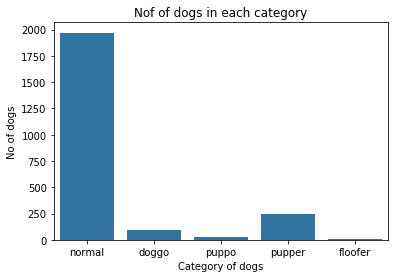

In [192]:
sb.countplot(data = twitter_df, x='category', color = base_color)
plt.ylabel('No of dogs')
plt.xlabel('Category of dogs')
plt.title('Nof of dogs in each category');

#### Conclusions
The above graph shows that most of the dogs belong to normal category. Floofer has the least no of dogs

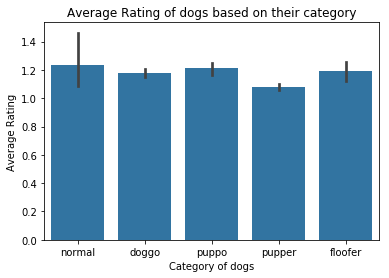

In [193]:
sb.barplot(data=twitter_df, x='category', y='rating', color=base_color);
plt.title('Average Rating of dogs based on their category');
plt.xlabel('Category of dogs')
plt.ylabel('Average Rating');

#### Conclusions
The above graph shows that normal category dogs have highest average rating and highest deviation

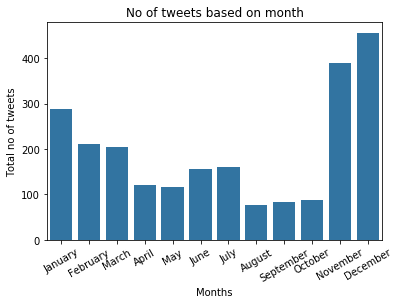

In [194]:
x_marker = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
            'November', 'December']
sb.countplot(data=twitter_df, x='Month', order=x_marker, color=base_color);
plt.title('No of tweets based on month')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.ylabel('Total no of tweets');

#### Conclusions
The above graph shows that most of the tweets are done in the November and December

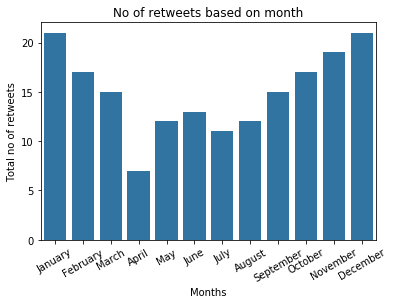

In [195]:
x_marker = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
            'November', 'December']
y_marker = [0, 5, 10, 15, 20]
sb.countplot(data=twitter_df, x='re-Month', order=x_marker, color=base_color);
plt.title('No of retweets based on month')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.yticks(y_marker)
plt.ylabel('Total no of retweets');

#### Conclusions
The above graph shows that most of the retweets are done in the beginning or the end of the year

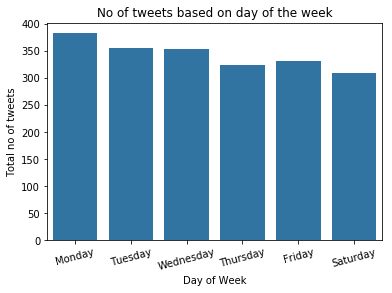

In [196]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=twitter_df, x='Day', order=x_marker, color=base_color);
plt.title('No of tweets based on day of the week')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Total no of tweets');

#### Conclusions
The above graph shows that most of the tweets are done on Monday and gradually decreasing by the end of the week

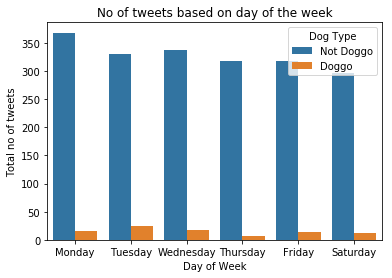

In [197]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=twitter_df, x='Day', hue='doggo', order=x_marker);
plt.title('No of tweets based on day of the week')
plt.legend(['Not Doggo','Doggo'], title='Dog Type');
plt.xlabel('Day of Week')
plt.ylabel('Total no of tweets');

#### Conclusions
The above graph shows that most of the tweets are done on Monday and gradually decreasing by the end of the week.
The most number of tweets for the doggo are done on Tuesday and the least on Thursday

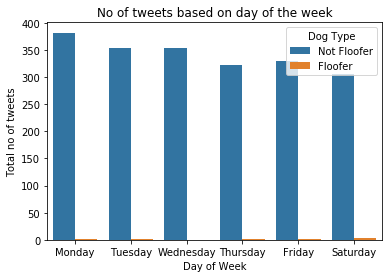

In [198]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=twitter_df, x='Day', hue='floofer', order=x_marker);
plt.title('No of tweets based on day of the week')
plt.legend(['Not Floofer','Floofer'], title='Dog Type');
plt.xlabel('Day of Week')
plt.ylabel('Total no of tweets');

#### Conclusions
The above graph shows that most of the tweets are done on Monday and gradually decreasing by the end of the week
The total number of tweets done for floofer are negligible as they are having very less population

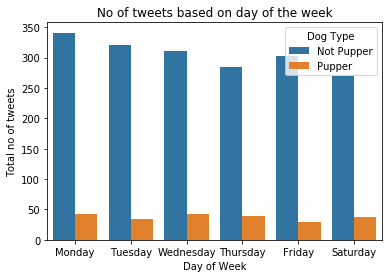

In [199]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=twitter_df, x='Day', hue='pupper', order=x_marker);
plt.title('No of tweets based on day of the week')
plt.legend(['Not Pupper','Pupper'], title='Dog Type');
plt.xlabel('Day of Week')
plt.ylabel('Total no of tweets');

#### Conclusions
The above graph shows that most of the tweets are done on Monday and gradually decreasing by the end of the week.
We can see that the numnber of pupper dogs are the most in number as compared to others

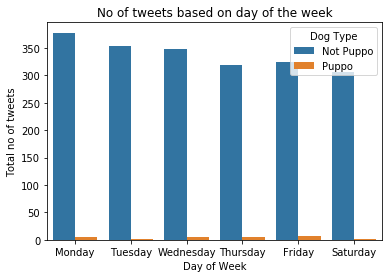

In [200]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=twitter_df, x='Day', hue='puppo', order=x_marker);
plt.title('No of tweets based on day of the week')
plt.legend(['Not Puppo','Puppo'], title='Dog Type');
plt.xlabel('Day of Week')
plt.ylabel('Total no of tweets');

#### Conclusions
The above graph shows that most of the tweets are done on Monday and gradually decreasing by the end of the week.
This category is also very less in number but not as less as the floofer breed.

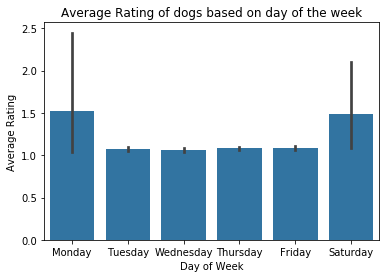

In [201]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.barplot(data=twitter_df, x='Day', y='rating', order=x_marker, color=base_color);
plt.title('Average Rating of dogs based on day of the week');
plt.xlabel('Day of Week')
plt.ylabel('Average Rating');

#### Conclusions
The above graph shows that the average rating of Monday and Saturday is maximum. Monday has the highest deviation in the ratings.

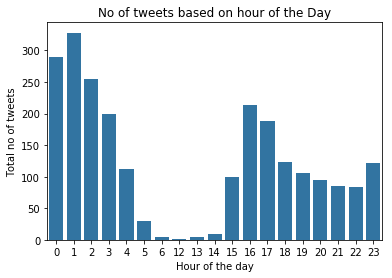

In [202]:
twitter_df.groupby('Hour').count()
sb.countplot(data=twitter_df, x='Hour', color=base_color);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of tweets')
plt.title('No of tweets based on hour of the Day');

#### Conclusions
The above graph shows that most of the tweets are done early in the morning or in the evening. The time between 5AM and 2PM has the least number of tweets

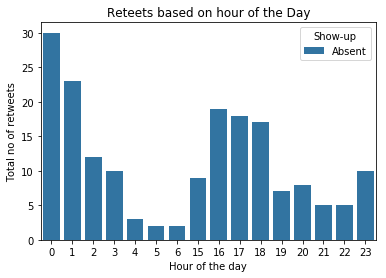

In [203]:
temp_twitter_df = twitter_df[twitter_df['re-Hour'].isna() == False]
temp_twitter_df = temp_twitter_df.astype( { 're-Hour' : int } )

sb.countplot(data=temp_twitter_df, x='re-Hour', color=base_color);
plt.legend(['Absent','Present'], title='Show-up');
plt.xlabel('Hour of the day')
plt.ylabel('Total no of retweets')
plt.title('Reteets based on hour of the Day');

#### Conclusions
The above graph shows that most of the reweets are done in the first hour of the day. Its a bimodal distributions having two peaks, first at 0 and second at $16^{th}$ hour

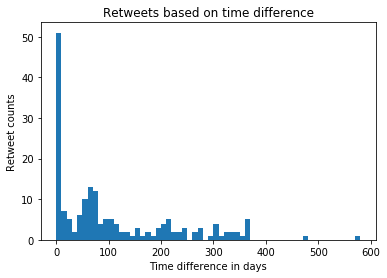

In [204]:
bin_size = np.arange(temp_twitter_df['retweetTime'].min(), temp_twitter_df['retweetTime'].max()+10, 10)
plt.hist(temp_twitter_df['retweetTime'], bins= bin_size);
plt.title('Retweets based on time difference')
plt.xlabel('Time difference in days')
plt.ylabel('Retweet counts');

#### Conclusions
The above graph shows that most of the retweets are done on the same day which is shown by the first peak at 0 which is the highest of all. There is almost 0 retweets after one year of the actual tweet

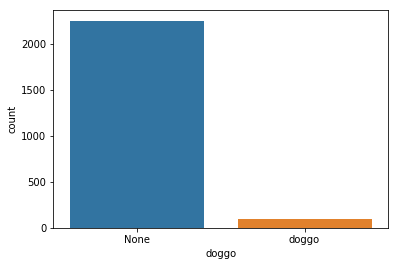

In [205]:
sb.countplot(data=twitter_df, x='doggo');

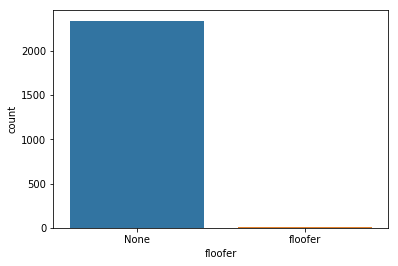

In [206]:
sb.countplot(data=twitter_df, x='floofer');

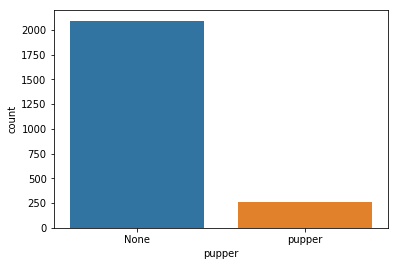

In [207]:
sb.countplot(data=twitter_df, x='pupper');

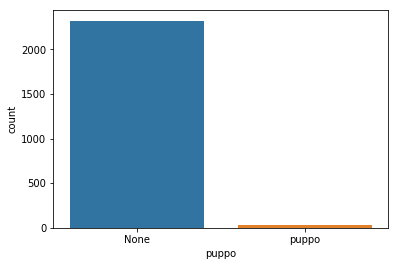

In [208]:
sb.countplot(data=twitter_df, x='puppo');

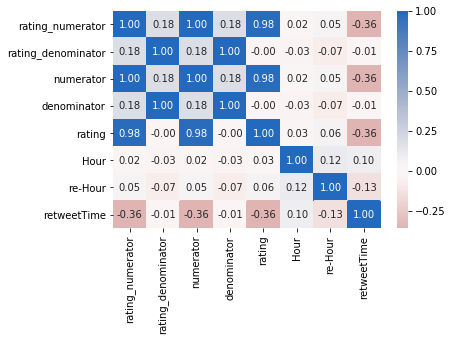

In [209]:
sb.heatmap(twitter_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

#### Conclusions
The above graph shows that Rating is highly correlated with the numerator of the data. So the numerator is sufficient for predicting the popularity of the dogs

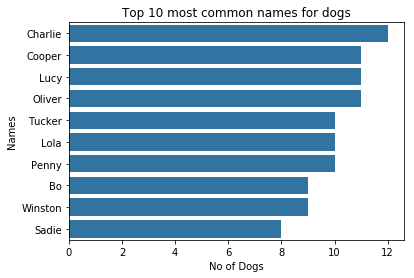

In [210]:
neighbourhood_counts = twitter_df['name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = twitter_df, y = 'name', order = neighbourhood_order[2:12], color=base_color)
plt.xlabel('No of Dogs')
plt.ylabel('Names')
plt.title('Top 10 most common names for dogs');

#### Conclusions
The above graph shows that the most common names used for dogs is Charlie followed by Lucy, Cooper and others

### Research Question 2  (Best rated dog)

#### Ratings given

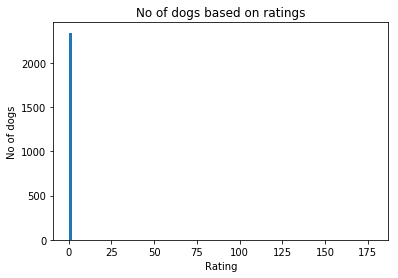

In [211]:
bin_size = np.arange(twitter_df['rating'].min(), twitter_df['rating'].max()+2, 2)
plt.hist(twitter_df['rating'], bins = bin_size);
plt.xlabel('Rating')
plt.ylabel('No of dogs')
plt.title('No of dogs based on ratings');

#### Conclusions
The above graph shows that almost all of the dogs have rating near 0. But few values are near 175.

### Taking a closer look at the point near 0

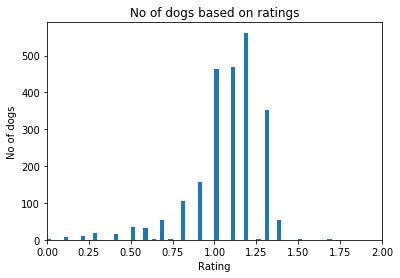

In [212]:
bin_size = np.arange(twitter_df['rating'].min(), twitter_df['rating'].max()+.025, .025)
plt.hist(twitter_df['rating'], bins=bin_size);
plt.xlim(0,2);
plt.xlabel('Rating')
plt.ylabel('No of dogs')
plt.title('No of dogs based on ratings');

#### Conclusions
The above graph shows that most of the dogs are rated between 1.00 and 1.25

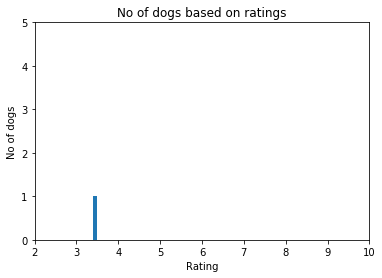

In [213]:
bin_size = np.arange(twitter_df['rating'].min(), twitter_df['rating'].max()+.1, .1)
plt.hist(twitter_df['rating'], bins=bin_size);
plt.xlim(2,10);
plt.ylim(0,5)
plt.xlabel('Rating')
plt.ylabel('No of dogs')
plt.title('No of dogs based on ratings');

#### Conclusions
The above graph shows that there are only 4 dogs having rating more than 2 and less than 10

In [214]:
twitter_df[(twitter_df['rating']>1.4) & (twitter_df['name'] != 'None')][['name', 'rating']].sort_values(by=['rating'], ascending=False)

,name,rating
979,Atticus,177.600000
516,Sam,3.428571


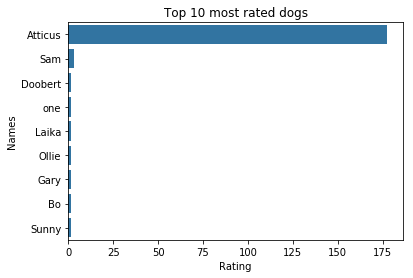

In [215]:
temp_df = twitter_df[(twitter_df['rating']>1.3) & (twitter_df['name'] != 'None')][['name', 'rating']].sort_values(by=['rating'], ascending=False)[:10]
sb.barplot(data = temp_df, x = 'rating', y = 'name', color=base_color)
plt.xlabel('Rating')
plt.ylabel('Names')
plt.title('Top 10 most rated dogs');

In [226]:
temp_df['name'].tolist()

['Atticus',
 'Sam',
 'Doobert',
 'one',
 'Laika',
 'Ollie',
 'Gary',
 'Bo',
 'Sunny',
 'Sunny']

#### Conclusions
The above table shows the highest rated dogs

<a id='conclusions'></a>
## End


<a href="#home">Home</a>

In [216]:
twitter_df.to_csv('data/twitter_df_clean.csv')